Opening song from [The Matrix](https://en.wikipedia.org/wiki/The_Matrix) and is called [Wake up](https://www.youtube.com/watch?v=wauzrPn0cfg).

[TOC](../toc.ipynb)

Advanced topics in linear algebra
=================================

- KEYWORDS: numpy.linalg.solve, scipy.interpolate.interp1d, numpy.linalg.eigvals, numpy.linalg.eig, numpy.argsort


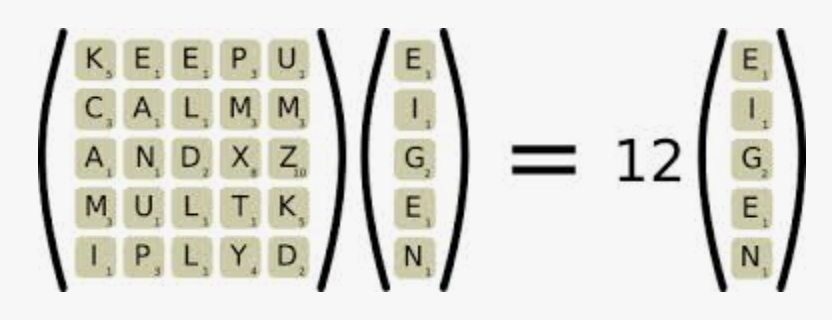



https://aperiodical.com/2018/10/this-matrix-joke-is-only-barely-worth-your-time/

Is it true?

## Interpolating between data points



It is a common need to interpolate between data points, especially when we don't have knowledge of the function relating the data. There are a variety of approaches you can use for interpolation. We will consider a few approaches that use linear algebra here. Given $N$ points, construct an $N^{th}$ order polynomial that goes through all the points, and that can be used to estimate new values between the points.

First we consider some data.



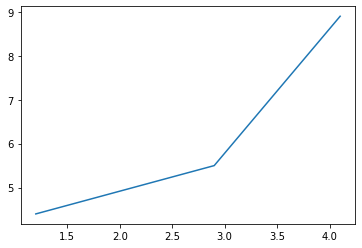

In [2]:
import numpy as np

x = np.array([1.2, 2.9, 4.1])
y = np.array([4.4, 5.5, 8.9])

import matplotlib.pyplot as plt

plt.plot(x, y);

We would like an equation like $y(x) = a_2 x^2 + a_1 x + a_0$. If we write these out for each data point we get:

$y_0 = a_2 x_0^2 + a_1 x_0 + a_0$

$y_1 = a_2 x_1^2 + a_1 x_1 + a_0$

and so on. Here, the things we don't know are the parameters $\mathbf{a} [a_2, a_1, a_0]$. We can write these as:

$\mathbf{X} \mathbf{a} = \mathbf{y}$

Where $\mathbf{X} = [\mathbf{x^2}, \mathbf{x}, \mathbf{1}]$, and is called a Vandermonde matrix. We can readily create these with `numpy.vander`.



In [3]:
np.vander?

Signature: np.vander(x, N=None, increasing=False)
Docstring:
Generate a Vandermonde matrix.

The columns of the output matrix are powers of the input vector. The
order of the powers is determined by the `increasing` boolean argument.
Specifically, when `increasing` is False, the `i`-th output column is
the input vector raised element-wise to the power of ``N - i - 1``. Such
a matrix with a geometric progression in each row is named for Alexandre-
Theophile Vandermonde.

Parameters
----------
x : array_like
    1-D input array.
N : int, optional
    Number of columns in the output.  If `N` is not specified, a square
    array is returned (``N = len(x)``).
increasing : bool, optional
    Order of the powers of the columns.  If True, the powers increase
    from left to right, if False (the default) they are reversed.

    .. versionadded:: 1.9.0

Returns
-------
out : ndarray
    Vandermonde matrix.  If `increasing` is False, the first column is
    ``x^(N-1)``, the second ``x^(N-2)`` an

In [4]:
np.vander([2, 3, 4])

array([[ 4,  2,  1],
       [ 9,  3,  1],
       [16,  4,  1]])

The first column is $x^2$, the second column is $x$, and the last column is all ones. To compute the polynomial coefficients, we just make the $\mathbf{X}$ array and solve the equations.



In [5]:
xx = np.array([2, 3, 4])
np.array([xx**2, xx**1, xx**0]).T  # transposed list of rows

array([[ 4,  2,  1],
       [ 9,  3,  1],
       [16,  4,  1]])

In [6]:
X = np.vander(x, 3)
a = np.linalg.solve(X, y)
a

array([ 0.75388776, -2.443881  ,  6.24705882])

Now, we can use the parameters to compute new values.



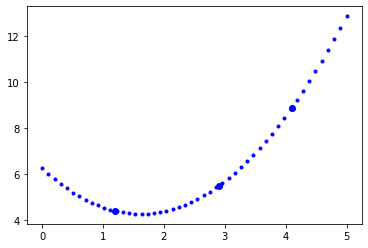

In [7]:
xfit = np.linspace(0, 5)
Y = np.vander(xfit, 3) @ a  # This is the matrix multiply

plt.plot(x, y, "bo", xfit, Y, "b.");

What we have done here is fit an N<sup>th</sup> order polynomial to $N$ data points. There is a possibility that we have overfit this data, and extrapolation is not reliable. However, interpolation by this method may be useful. We will return to this for larger data sets where $N$ is much larger than the order of the polynomial when we talk about linear regression next week.



we previously looked at polyfit for this.

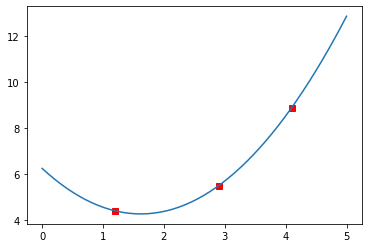

In [8]:
p = np.polyfit(x, y, 2)
plt.plot(x, y, "rs", xfit, np.polyval(p, xfit));

### Interpolation libraries



There are several interpolating functions available in [scipy.interpolate](https://docs.scipy.org/doc/scipy/reference/interpolate.html). These are usually more flexible and convenient than writing your own interpolating code. They are more sophisticated, and have some *features* you should be aware of.



In [9]:
from scipy.interpolate import interp1d

interp1d?

Init signature:
interp1d(
    x,
    y,
    kind='linear',
    axis=-1,
    copy=True,
    bounds_error=None,
    fill_value=nan,
    assume_sorted=False,
)
Docstring:     
Interpolate a 1-D function.

`x` and `y` are arrays of values used to approximate some function f:
``y = f(x)``. This class returns a function whose call method uses
interpolation to find the value of new points.

Parameters
----------
x : (N,) array_like
    A 1-D array of real values.
y : (...,N,...) array_like
    A N-D array of real values. The length of `y` along the interpolation
    axis must be equal to the length of `x`.
kind : str or int, optional
    Specifies the kind of interpolation as a string or as an integer
    specifying the order of the spline interpolator to use.
    The string has to be one of 'linear', 'nearest', 'nearest-up', 'zero',
    'slinear', 'quadratic', 'cubic', 'previous', or 'next'. 'zero',
    'slinear', 'quadratic' and 'cubic' refer to a spline interpolation of
    zeroth, first, 

Linear interpolation is the default, and we have to explicitly allow extrapolation.



array([ 3.62352941,  3.68955582,  3.75558223,  3.82160864,  3.88763505,
        3.95366146,  4.01968788,  4.08571429,  4.1517407 ,  4.21776711,
        4.28379352,  4.34981993,  4.41584634,  4.48187275,  4.54789916,
        4.61392557,  4.67995198,  4.74597839,  4.8120048 ,  4.87803121,
        4.94405762,  5.01008403,  5.07611044,  5.14213685,  5.20816327,
        5.27418968,  5.34021609,  5.4062425 ,  5.47226891,  5.66768707,
        5.95680272,  6.24591837,  6.53503401,  6.82414966,  7.11326531,
        7.40238095,  7.6914966 ,  7.98061224,  8.26972789,  8.55884354,
        8.84795918,  9.13707483,  9.42619048,  9.71530612, 10.00442177,
       10.29353741, 10.58265306, 10.87176871, 11.16088435, 11.45      ])

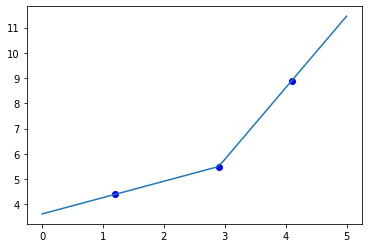

In [10]:
xfit = np.linspace(0, 5)
Y = interp1d(x, y, bounds_error=False, fill_value="extrapolate")  # Returns a "function"

plt.plot(x, y, "bo", xfit, Y(xfit))
Y(xfit)

We can also specify quadratic spline interpolation.



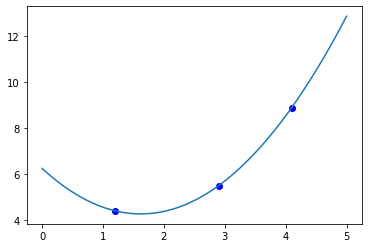

In [11]:
Y = interp1d(x, y, kind="quadratic", bounds_error=False, fill_value="extrapolate")

plt.plot(x, y, "bo", xfit, Y(xfit));

In [12]:
from scipy.optimize import minimize

minimize(Y, 1.5)

      fun: 4.266474097757241
 hess_inv: array([[0.66322879]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.62085204])

In [13]:
from scipy.optimize import root


def f(x):
    return Y(x) - 8


root(f, 4)

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-2.30873098e-11])
       r: array([-3.35538953])
  status: 1
 success: True
       x: array([3.84624256])

With more data points you can also use cubic interpolation, which fits a cubic polynomial between the points, and ensures smoothness and continuity of the derivatives at the endpoints.

Note that you have to make some decisions about how to interpolate. These functions can introduce *wiggles* that are not real. Especially when there are step or sharp changes  in values.



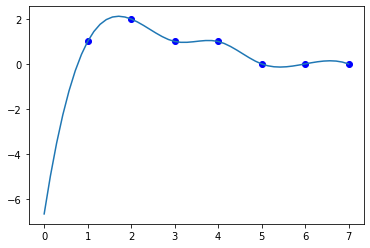

In [14]:
x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([1, 2, 1, 1, 0, 0, 0])

s = interp1d(x, y, kind="cubic", bounds_error=False, fill_value="extrapolate")
X = np.linspace(0, 7)
Y = s(X)

plt.plot(x, y, "bo", X, Y);

Interpolation is a kind of data driven model for developing a mathematical model from data that can be used to predict new values. These models are not based on physics, but they can be used for predicting new values, estimating derivatives, integrals, etc. Of course, you must be careful with extrapolation; all polynomials tend to &plusmn; infinity eventually, which is probably not physically relevant in most cases.

There are multidimensional interpolation functions in `scipy.interpolate`,



## Eigenvalues



Eigenvalues and eigenvectors form an important class of linear algebra problems. They are an unusual class of problems though. Recall that we can interpret the equation $\mathbf{A}\mathbf{x} = \mathbf{b}$ as a linear transformation of the vector $\mathbf{x}$ into the vector $\mathbf{b}$. This will in general lead to rotation and stretching of the input vector. *Sometimes* though the new vector $\mathbf{b}$ is simply a rescaling of the original vector, i.e. $\mathbf{b} = \lambda \mathbf{x}$. &lambda; is the scaling factor, and it just changes the magnitude of the $\mathbf{x}$ vector. In this case, we call &lambda; an *eigenvalue*, and $\mathbf{x}$ and *eigenvector* of the matrix $\mathbf{A}$.

When you see a problem in the form:

$\mathbf{A}\mathbf{x} = \lambda \mathbf{x}$

It is called an eigenvalue problem. It is conventional to write it in the following form:

$(\mathbf{A} - \lambda \mathbf{I})\mathbf{x} = \mathbf{0}$

Based on this equation, since $\mathbf{x}$ can be anything, it is necessary for the determinant of the matrix on the left to be zero. The eigenvalues of $\mathbf{A}$ are the ones that are solutions to

$det(\mathbf{A} - \lambda \mathbf{I}) = 0$

Computing the determinant leads to a *characteristic polynomial* in &lambda;, and the roots of this polynomial are the eigenvalues of the matrix.

For an $N \times N$ array there will be $N$ eigenvalues, although some may be degenerate. The eigenvalues can be real or complex. For some matrices, we know some properties of the eigenvalues. We will consider some of them here.

For example, the eigenvalues of a symmetric matrix are always real. We can make a symmetric matrix with some algebra:



In [15]:
np.random.seed(42)  # this makes the random numbers reproducible
A = np.random.rand(3, 3)
A += A.T  # This makes a symmetric matrix
A

array([[0.74908024, 1.54937279, 0.79007755],
       [1.54937279, 0.31203728, 1.02217067],
       [0.79007755, 1.02217067, 1.20223002]])

In [16]:
np.allclose(A, A.T)  # definition of a symmetric matrix

True

We get the eigenvalues with `numpy.linalg.eigvals`.



In [17]:
np.linalg.eigvals(A)  # only the eigenvalues

array([ 2.99729665, -1.0705158 ,  0.33656669])

You can see these are all real.

The *trace* of a matrix is the sum of the diagonal elements. You can do this manually, or use `numpy.trace`.



In [18]:
np.sum(np.diag(A)), np.trace(A)

(2.2633475420660156, 2.2633475420660156)

It is a property that the sum of the eigenvalues is equal to the trace:

$trace \mathbf{A} = \sum \lambda_k$



In [19]:
np.sum(np.linalg.eigvals(A))

2.263347542066017

It is also true that the product of the eigenvalues is equal to the determinant:

$det \mathbf{A} = \prod \lambda_k$



In [20]:
np.prod(np.linalg.eigvals(A)), np.linalg.det(A)

(-1.0799258609269764, -1.079925860926975)

In [21]:
# np.random.seed(42)  # this makes the random numbers reproducible
B = np.random.rand(3, 3)
np.prod(np.linalg.eigvals(B)), np.linalg.det(B), np.linalg.eigvals(B)

((0.23929402866936367+6.938893903907228e-18j),
 0.23929402866936386,
 array([1.2920795 +0.j        , 0.07654431+0.42348751j,
        0.07654431-0.42348751j]))

We can also see the eigenvectors. The `numpy.linalg.eig` function returns *both* eigenvalues and eigenvectors. The eigenvectors are in *columns*



In [22]:
?np.linalg.eig

Signature: np.linalg.eig(a)
Docstring:
Compute the eigenvalues and right eigenvectors of a square array.

Parameters
----------
a : (..., M, M) array
    Matrices for which the eigenvalues and right eigenvectors will
    be computed

Returns
-------
w : (..., M) array
    The eigenvalues, each repeated according to its multiplicity.
    The eigenvalues are not necessarily ordered. The resulting
    array will be of complex type, unless the imaginary part is
    zero in which case it will be cast to a real type. When `a`
    is real the resulting eigenvalues will be real (0 imaginary
    part) or occur in conjugate pairs

v : (..., M, M) array
    The normalized (unit "length") eigenvectors, such that the
    column ``v[:,i]`` is the eigenvector corresponding to the
    eigenvalue ``w[i]``.

Raises
------
LinAlgError
    If the eigenvalue computation does not converge.

See Also
--------
eigvals : eigenvalues of a non-symmetric array.
eigh : eigenvalues and eigenvectors of a real symmet

In [23]:
np.linalg.eigvals(A)

array([ 2.99729665, -1.0705158 ,  0.33656669])

In [24]:
e, v = np.linalg.eig(A)
e, v

(array([ 2.99729665, -1.0705158 ,  0.33656669]),
 array([[-0.59060872, -0.60533548, -0.53361999],
        [-0.5614231 ,  0.78323314, -0.26711411],
        [-0.57964251, -0.14182666,  0.80243365]]))

In [25]:
e

array([ 2.99729665, -1.0705158 ,  0.33656669])

These eigenvectors have the property that the are normalized to unit length:



In [26]:
[np.linalg.norm(v[:, i]) for i in [0, 1, 2]]  # norm is length of a vector

[0.9999999999999999, 1.0, 1.0]

In [27]:
# Other ways to get the length of a vector
for i in range(3):
    ev = v[:, i]
    L = np.sqrt(ev @ ev)
    print(i, L, np.dot(ev, ev) ** 0.5)

0 0.9999999999999999 0.9999999999999999
1 1.0 1.0
2 1.0 1.0


In [28]:
?np.linalg.norm

Signature: np.linalg.norm(x, ord=None, axis=None, keepdims=False)
Docstring:
Matrix or vector norm.

This function is able to return one of eight different matrix norms,
or one of an infinite number of vector norms (described below), depending
on the value of the ``ord`` parameter.

Parameters
----------
x : array_like
    Input array.  If `axis` is None, `x` must be 1-D or 2-D, unless `ord`
    is None. If both `axis` and `ord` are None, the 2-norm of
    ``x.ravel`` will be returned.
ord : {non-zero int, inf, -inf, 'fro', 'nuc'}, optional
    Order of the norm (see table under ``Notes``). inf means numpy's
    `inf` object. The default is None.
axis : {None, int, 2-tuple of ints}, optional.
    If `axis` is an integer, it specifies the axis of `x` along which to
    compute the vector norms.  If `axis` is a 2-tuple, it specifies the
    axes that hold 2-D matrices, and the matrix norms of these matrices
    are computed.  If `axis` is None then either a vector norm (when `x`
    is 1

The eigenvectors are in columns in the order corresponding to the order of the eigenvalues (these are not necessarily sorted). Here, we show that the eigenvalue/eigenvector pairs satisfy $\mathbf{A} \mathbf{v} = \lambda \mathbf{v}$.



In [29]:
A @ v[:, 0], e[0] * v[:, 0]

(array([-1.77022954, -1.68275159, -1.73736055]),
 array([-1.77022954, -1.68275159, -1.73736055]))

In [30]:
[
    np.allclose(A @ v[:, 0], e[0] * v[:, 0]),
    np.allclose(A @ v[:, 1], e[1] * v[:, 1]),
    np.allclose(A @ v[:, 2], e[2] * v[:, 2]),
]

[True, True, True]

If you mix and match these, they do not satisfy the equations.



In [31]:
[
    np.allclose(A @ v[:, 0], e[1] * v[:, 0]),
    np.allclose(A @ v[:, 1], e[0] * v[:, 1]),
    np.allclose(A @ v[:, 0], e[2] * v[:, 0]),
]

[False, False, False]

In [32]:
e

array([ 2.99729665, -1.0705158 ,  0.33656669])

In [33]:
e.min()

-1.0705157973407726

In [34]:
I = np.argmin(e)

In [35]:
e[I], v[:, I]  # min eval and corresponding evec

(-1.0705157973407726, array([-0.60533548,  0.78323314, -0.14182666]))

The eigenvalues are not sorted. It is often useful to know the smallest, or largest eigenvalue, and to have the eigenvalues sorted. The tricky point to consider is the eigenvectors have to be sorted in the same order. It is also tricky that the eigenvectors are stored in columns, but sorting is done on rows. You can simply transpose the eigenvector array, sort on rows, and then transpose it back to columns.



In [36]:
e, e[np.argsort(e)]

(array([ 2.99729665, -1.0705158 ,  0.33656669]),
 array([-1.0705158 ,  0.33656669,  2.99729665]))

In [37]:
i = np.argsort(e)
i

array([1, 2, 0])

In [38]:
# use indexing to get the sorted list
sorted_e = e[i]  # these are the sorted eigenvalues
sorted_v = v.T[i].T  # sort the transposed vectors, and transpose back to columns
sorted_e, sorted_v

(array([-1.0705158 ,  0.33656669,  2.99729665]),
 array([[-0.60533548, -0.53361999, -0.59060872],
        [ 0.78323314, -0.26711411, -0.5614231 ],
        [-0.14182666,  0.80243365, -0.57964251]]))

*As always* it is a good idea to check that we did not mess up:



In [39]:
for ind, se in enumerate(sorted_e):
    sv = sorted_v[:, ind]
    print(np.allclose(A @ sv, se * sv), A @ sv, se * sv)

True [ 0.6480212  -0.83846345  0.15182768] [ 0.6480212  -0.83846345  0.15182768]
True [-0.17959871 -0.08990171  0.27007244] [-0.17959871 -0.08990171  0.27007244]
True [-1.77022954 -1.68275159 -1.73736055] [-1.77022954 -1.68275159 -1.73736055]


### Application to roots of a polynomial



In [40]:
?np.roots

Signature: np.roots(p)
Docstring:
Return the roots of a polynomial with coefficients given in p.

.. note::
   This forms part of the old polynomial API. Since version 1.4, the
   new polynomial API defined in `numpy.polynomial` is preferred.
   A summary of the differences can be found in the
   :doc:`transition guide </reference/routines.polynomials>`.

The values in the rank-1 array `p` are coefficients of a polynomial.
If the length of `p` is n+1 then the polynomial is described by::

  p[0] * x**n + p[1] * x**(n-1) + ... + p[n-1]*x + p[n]

Parameters
----------
p : array_like
    Rank-1 array of polynomial coefficients.

Returns
-------
out : ndarray
    An array containing the roots of the polynomial.

Raises
------
ValueError
    When `p` cannot be converted to a rank-1 array.

See also
--------
poly : Find the coefficients of a polynomial with a given sequence
       of roots.
polyval : Compute polynomial values.
polyfit : Least squares polynomial fit.
poly1d : A one-dimensiona

The eigenvalues of a matrix are related to the roots of the characteristic polynomial of the matrix. We can leverage this to find the roots of a polynomial by constructing a matrix that has as its characteristic polynomial the polynomial we want the roots for. Then, the roots of the polynomial are just the eigenvalues of that matrix.

This example is adapted from [http://www.math.utah.edu/~gustafso/s2018/2270/labs/lab7-polyroot-qrmethod.pdf](http://www.math.utah.edu/~gustafso/s2018/2270/labs/lab7-polyroot-qrmethod.pdf)

First, we construct the *companion matrix*. For the polynomial $p(x) = a_0 + a_1 x + ... + a_{n-1} x^{n-1} + x^n$ we construct:

$C = \left[\begin{array}{ccccc}
 0 & 1 & 0 & ... & 0\\
 0 & 0 & 1 & ... & 0\\
 ... & ... & ... & \ddots & \vdots \\
 0 & 0 & 0 & ... & 1\\
 -a_0 & -a_1 & -a_2 & ... & -a_{n-1}
 \end{array}\right]$

Then, the eigenvalues of this matrix are equal to the roots of the polynomial. This matrix has ones on the diagonal above the main diagonal, and the coefficients up to the leading power on the bottom row. Note the coefficients are in the opposite order as we usually define them for `np.roots`.

The main diagonal has `N-1` elements in it, and the diagonal above that has `N-2` elements in it.

There are a few ways to reverse the coefficients, here we use `numpy.flipud` which reverses the elements.

Let $p(x) = 4 x^2 + 3x - 1$. We write the coefficient vector in the same order as used in np.roots.



In [41]:
(-p[1:] / p[0])[::-1], np.flipud(
    -p[1:] / p[0]
)  # Two different ways to reverse an array

(array([-8.2864574 ,  3.24170404]), array([-8.2864574 ,  3.24170404]))

In [42]:
p = np.array([4, 3, -1])  # polynomial coefficients
N = len(p)

C = np.diag(np.ones(N - 2), 1)
C[-1, :] = np.flipud(-p[1:] / p[0])  # This is the bottom row
C

array([[ 0.  ,  1.  ],
       [ 0.25, -0.75]])

Now the roots are found as the eigenvalues of the matrix.



In [43]:
np.linalg.eigvals(C)

array([ 0.25, -1.  ])

This is essentially what the `np.roots` function does, although it uses a slightly different way to define the companion matrix.



In [44]:
import numpy as np
??np.roots

Signature: np.roots(p)
Source:   
@array_function_dispatch(_roots_dispatcher)
def roots(p):
    """
    Return the roots of a polynomial with coefficients given in p.

    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.

    The values in the rank-1 array `p` are coefficients of a polynomial.
    If the length of `p` is n+1 then the polynomial is described by::

      p[0] * x**n + p[1] * x**(n-1) + ... + p[n-1]*x + p[n]

    Parameters
    ----------
    p : array_like
        Rank-1 array of polynomial coefficients.

    Returns
    -------
    out : ndarray
        An array containing the roots of the polynomial.

    Raises
    ------
    ValueError
        When `p` cannot be converted to a rank-1 array.

    See also
    --------
    poly : Find the coeffici

In [45]:
p = [4, 3, -1]
np.roots(p)

array([-1.  ,  0.25])

The order of the roots is not important; they may or may not be sorted.



Try joke at top of lecture - it works!

In [46]:
V = np.array(
    [
        [5, 1, 1, 3, 1],
        [3, 1, 1, 3, 3],
        [1, 1, 2, 8, 10],
        [3, 1, 1, 1, 5],
        [1, 3, 1, 4, 2],
    ]
)

b = np.array([1, 1, 2, 1, 1])
V @ b - 12 * b

array([0, 0, 0, 0, 0])

In [47]:
with np.printoptions(precision=2, suppress=True):
    print(np.linalg.eigvals(V))

[12.    3.08 -3.3  -0.   -0.79]


In [48]:
np.linalg.eigvals(V)

array([ 1.20000000e+01,  3.08387236e+00, -3.29707054e+00, -1.94462647e-15,
       -7.86801815e-01])

### Applications to optimization



We can use eigenvalues to detect what kind of stationary point (f'(x) = 0) we are at. We have to know the [Hessian matrix](https://en.wikipedia.org/wiki/Hessian_matrix) at the stationary point. The eigenvalues of this matrix tell us about the stationary point.

1.  If all the eigenvalues are all positive, the matrix is called positive definite, and it means the stationary point is a minimum.
2.  If all the eigenvalues are negative, the matrix is called negative definite, and it means the stationary point is a maximum.
3.  If the signs of the eigenvalues are mixed then the stationary point is a saddle point.
4.  If there are zeros, it is inconclusive, and further analysis is needed.

Let's consider an example:



In [49]:
from scipy.optimize import minimize


def f(X):
    x, y = X
    return 2 * x**2 + 2 * x * y + 2 * y**2 - 6 * x


sol = minimize(f, [0, 0])
sol

      fun: -6.0
 hess_inv: array([[ 0.33333336, -0.16666668],
       [-0.16666668,  0.33333332]])
      jac: array([ 0.00000000e+00, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 2.        , -1.00000001])

We get an estimate of the inverse hessian here, so we convert it to a hessian first.



In [50]:
h = np.linalg.inv(sol["hess_inv"])
h

array([[3.9999999 , 2.00000026],
       [2.00000026, 4.00000044]])

Now we check the eigenvalues:



In [51]:
np.linalg.eigvals(h)

array([1.99999991, 6.00000043])

We have two positive eigenvalues, so the Hessian is positive definite, and we are at a minimum.

We can also use tools to compute the Hessian more directly (of course you can derive the partial derivatives by hand also):



In [52]:
import numdifftools as nd

H = nd.Hessian(f)
np.linalg.eigvals(H(sol.x))  # eigenvalues of Hessian at the solution minimum

array([6., 2.])

Note the order of the eigenvalues is not important.

We will see more about numerical tools for computing Hessians and derivatives after Thanksgiving.



## Summary



Today we introduced the ideas behind interpolation which is a data-driven approach to model building that involves locally fitting functions to a few data points. We also introduced eigenvalues and eigenvectors, and some applications of how they are used.

Next week we will conclude linear algebra with linear regression.

